/var/folders/y9/2rxtmq5d4rs75j3fynzjqhxh0000gn/T/ipykernel_42227/3984300925.py:12: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Ix = filters.sobel(image, axis=0)
/var/folders/y9/2rxtmq5d4rs75j3fynzjqhxh0000gn/T/ipykernel_42227/3984300925.py:13: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Iy = filters.sobel(image, axis=1)


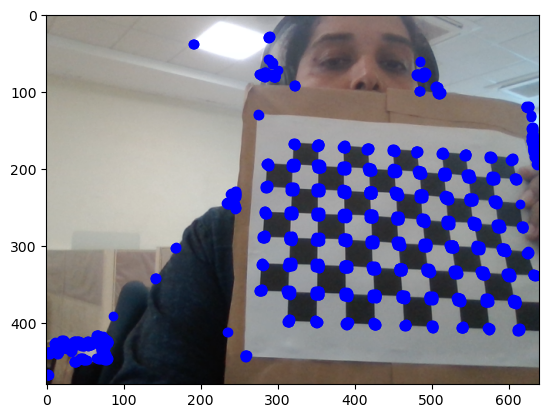

In [2]:
import numpy as np
from scipy.ndimage import filters
import matplotlib.pyplot as plt
import cv2
from gaussian import Gaussian

class HarrisCornerDetector:
    def __init__(self, k=0.04, threshold=1e-2):
        self.k = k
        self.threshold = threshold
    def compute_gradients(self, image):
        Ix = filters.sobel(image, axis=0)
        Iy = filters.sobel(image, axis=1)
        return Ix, Iy
    def compute_products_of_gradients(self, Ix, Iy):
        Ixx = Ix**2
        Iyy = Iy**2
        Ixy = Ix*Iy
        return Ixx, Iyy, Ixy
  
    def apply_gaussian_filter(self, Ixx, Iyy, Ixy, sigma=1):
        gaussian= Gaussian()

        Ixx = gaussian.apply_gaussian_filter(Ixx, sigma)
        Iyy = gaussian.apply_gaussian_filter(Iyy, sigma)
        Ixy = gaussian.apply_gaussian_filter(Ixy, sigma)
        return Ixx, Iyy, Ixy
    def compute_harris_response(self, Ixx, Iyy, Ixy):
        detM = Ixx * Iyy - Ixy**2
        traceM = Ixx + Iyy
        R = detM - self.k * (traceM**2)
        return R
    def threshold_response(self, R):
        corners = np.zeros_like(R)
        corners[R > self.threshold * R.max()] = 1
        return corners
    def detect_corners(self, image):
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        Ix, Iy = self.compute_gradients(gray_image)
        Ixx, Iyy, Ixy = self.compute_products_of_gradients(Ix, Iy)
        Ixx, Iyy, Ixy = self.apply_gaussian_filter(Ixx, Iyy, Ixy)
        R = self.compute_harris_response(Ixx, Iyy, Ixy)
        corners = self.threshold_response(R)
        return corners
image = plt.imread('calibration Data/image0.png')
detector = HarrisCornerDetector()
corners = detector.detect_corners(image)
plt.imshow(image, cmap='gray')
plt.scatter(np.where(corners)[1], np.where(corners)[0], c='b')
plt.show()